## COVID-19 Time Series Forecasting with LSTM

###### Importing the dataset and creating the log transformed  confirmed cases variable
The LSTM is a deep learning method and unlike the OLS and ARIMA it is not sensitive to outliers and does not assume normal distribution of the variables. The model was developed using the confirmed_casesa and the log transformed version of the confirmed cases to forecast the time series. The resuly of the visualization showed some differences and this is presented in the result section of this notebook.

In [48]:
# Load the data into a pandas DataFrame
df = pd.read_csv("time_series.csv")

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y')

# set the index to the date column
df = df.set_index("Date")


# Log transform the dependent and independent variables to address skewness
df['Confirmed_cases_log'] = np.log(df['Confirmed_cases'] + 1)



In [49]:
df.head()

,1st_dose,C1E_School closing,C2E_Workplace closing,C3E_Cancel public events,C4E_Restrictions on gatherings,C5E_Close public transport,C6E_Stay at home requirements,C7E_Restrictions on internal movement,C8EV_International travel controls,H1E_Public information campaigns,H2E_Testing policy,H3E_Contact tracing,H6E_Facial Coverings,H7E_Vaccination policy,Confirmed_cases,Confirmed_cases_log
Date,,,,,,,,,,,,,,,,
2020-01-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2020-01-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


###### Splitting the dataset into training and test set

In [50]:
def split_train_test(df, train_percentage=0.8):
    split_index = int(len(df) * train_percentage)
    df1 = df[:split_index]
    df2 = df[split_index:]
    return df1, df2

df1, df2 = split_train_test(df)

###### Creating a numpy array of the training set

In [51]:
df1 = df1.iloc[:, -1:].values

###### Applying Feature Scaling

In [52]:
# Scale the variables to have zero mean and unit variance
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(df1)

###### Creating a data structure with 7 timesteps and 1 output

In [53]:
X_train = []
y_train = []
for i in range(7, 832):
    X_train.append(training_set_scaled[i-7:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

###### Reshaping X_train datastructure to fit the 3D structure expected by the RNN

In [54]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [55]:
X_train.shape

(825, 7, 1)

###### Initializing the RNN, building the layers and adding some dropout regularization

In [56]:
# Initializing the RNN
regressor = Sequential()

# Adding the first LSTM layer with dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding the second LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding the third LSTM layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the fourth LSTM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

###### Fitting the RNN to the training set data

In [57]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
26/26 [==============================] - 8s 15ms/step - loss: 0.1328
Epoch 2/100
26/26 [==============================] - 0s 15ms/step - loss: 0.0262
Epoch 3/100
26/26 [==============================] - 0s 16ms/step - loss: 0.0131
Epoch 4/100
26/26 [==============================] - 0s 16ms/step - loss: 0.0104
Epoch 5/100
26/26 [==============================] - 0s 16ms/step - loss: 0.0107
Epoch 6/100
26/26 [==============================] - 0s 16ms/step - loss: 0.0103
Epoch 7/100
26/26 [==============================] - 0s 15ms/step - loss: 0.0104
Epoch 8/100
26/26 [==============================] - 0s 13ms/step - loss: 0.0104
Epoch 9/100
26/26 [==============================] - 0s 14ms/step - loss: 0.0106
Epoch 10/100
26/26 [==============================] - 0s 15ms/step - loss: 0.0097
Epoch 11/100
26/26 [==============================] - 0s 15ms/step - loss: 0.0095
Epoch 12/100
26/26 [==============================] - 0s 16ms/step - loss: 0.0094
Epoch 13/100
26/26 [=====

###### Creating the test set data structure

In [58]:
real_case = df2.iloc[:, -1:].values

In [59]:
len(real_case)

209

In [60]:
real_case

array([[2.30258509],
       [1.60943791],
       [1.60943791],
       [1.94591015],
       [1.09861229],
       [2.30258509],
       [1.60943791],
       [1.38629436],
       [0.69314718],
       [1.60943791],
       [1.60943791],
       [1.09861229],
       [2.07944154],
       [1.94591015],
       [1.94591015],
       [2.56494936],
       [3.4657359 ],
       [1.60943791],
       [1.79175947],
       [1.09861229],
       [1.79175947],
       [2.07944154],
       [1.79175947],
       [2.63905733],
       [2.19722458],
       [1.60943791],
       [2.39789527],
       [2.56494936],
       [2.48490665],
       [2.99573227],
       [2.7080502 ],
       [1.79175947],
       [3.09104245],
       [2.07944154],
       [2.7080502 ],
       [2.7080502 ],
       [2.19722458],
       [2.39789527],
       [2.39789527],
       [2.77258872],
       [1.94591015],
       [2.89037176],
       [2.7080502 ],
       [2.94443898],
       [2.19722458],
       [2.39789527],
       [2.63905733],
       [3.135

###### Making Predictions on the test set

In [67]:
dataset_total = df['Confirmed_cases_log']
inputs = dataset_total[len(dataset_total) - len(df2) - 7:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(7, 216):
    X_test.append(inputs[i-7:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_cases = regressor.predict(X_test)
predicted_cases = sc.inverse_transform(predicted_cases)

7/7 [==============================] - 0s 4ms/step


In [68]:
sc.inverse_transform(inputs)

array([[2.94443898],
       [2.83321334],
       [2.48490665],
       [2.19722458],
       [2.7080502 ],
       [1.94591015],
       [2.30258509],
       [2.30258509],
       [1.60943791],
       [1.60943791],
       [1.94591015],
       [1.09861229],
       [2.30258509],
       [1.60943791],
       [1.38629436],
       [0.69314718],
       [1.60943791],
       [1.60943791],
       [1.09861229],
       [2.07944154],
       [1.94591015],
       [1.94591015],
       [2.56494936],
       [3.4657359 ],
       [1.60943791],
       [1.79175947],
       [1.09861229],
       [1.79175947],
       [2.07944154],
       [1.79175947],
       [2.63905733],
       [2.19722458],
       [1.60943791],
       [2.39789527],
       [2.56494936],
       [2.48490665],
       [2.99573227],
       [2.7080502 ],
       [1.79175947],
       [3.09104245],
       [2.07944154],
       [2.7080502 ],
       [2.7080502 ],
       [2.19722458],
       [2.39789527],
       [2.39789527],
       [2.77258872],
       [1.945

In [69]:
X_test.shape

(209, 7, 1)

###### Getting the original confirmed cases and predicted cases

In [70]:
new_real_case = np.exp(real_case)-1
new_predicted_cases = np.exp(predicted_cases)-1

###### Visualizing the results

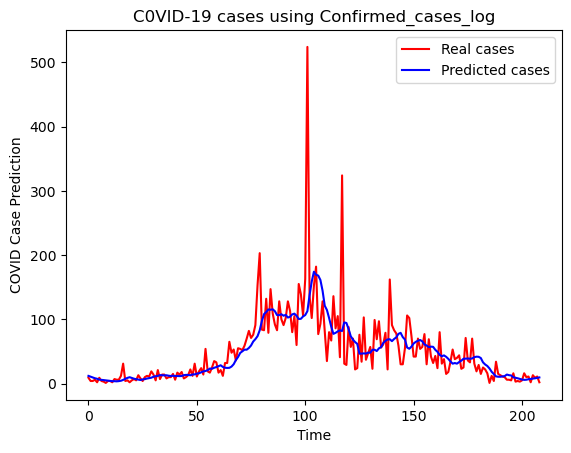

In [71]:
plt.plot(new_real_case, color = 'red', label = 'Real cases')
plt.plot(new_predicted_cases, color = 'blue', label = 'Predicted cases')
plt.title('C0VID-19 cases using Confirmed_cases_log')
plt.xlabel('Time')
plt.ylabel('COVID Case Prediction')
plt.legend()
plt.show()

###### Evaluating the model Using RSME
For this problem we are interested in the directions taken by our predictions, and also the closeness of their values to the real confirmed cases.

In [76]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(new_real_case, new_predicted_cases))
print(rmse)

41.58032717537995


In [77]:
range_new_real_case = np.max(new_real_case) - np.min(new_real_case)
print(range_new_real_case)

522.9999999999999


In [79]:
relative_error = rmse/range_new_real_case
print(relative_error)

0.07950349364317391


###### Evaluating the model
On average, the predicted values are off by about 41.6 as shown by the RMSE units from the actual values. The lower the RMSE value, the better the model's predictive performance.

The RMSE represents around 7.95% of the range of the dependent variable. The smaller the percentage of the RMSE to the range of the dependent variable, the better the model's predictive performance. For this analysis, I think the model performed really well considerin the sharp spikes in the time series and there is no identifiable trend in the data.

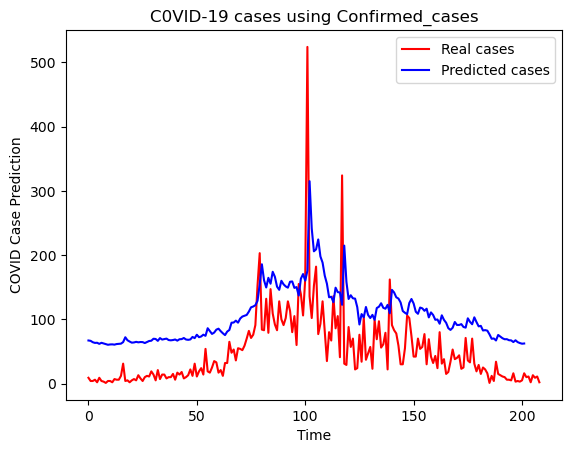

In [17]:
plt.plot(real_case, color = 'red', label = 'Real cases')
plt.plot(predicted_cases, color = 'blue', label = 'Predicted cases')
plt.title('C0VID-19 cases using Confirmed_cases')
plt.xlabel('Time')
plt.ylabel('COVID Case Prediction')
plt.legend()
plt.show()

In [59]:
new_real_case

array([[  9.],
       [  4.],
       [  4.],
       [  6.],
       [  2.],
       [  9.],
       [  4.],
       [  3.],
       [  1.],
       [  4.],
       [  4.],
       [  2.],
       [  7.],
       [  6.],
       [  6.],
       [ 12.],
       [ 31.],
       [  4.],
       [  5.],
       [  2.],
       [  5.],
       [  7.],
       [  5.],
       [ 13.],
       [  8.],
       [  4.],
       [ 10.],
       [ 12.],
       [ 11.],
       [ 19.],
       [ 14.],
       [  5.],
       [ 21.],
       [  7.],
       [ 14.],
       [ 14.],
       [  8.],
       [ 10.],
       [ 10.],
       [ 15.],
       [  6.],
       [ 17.],
       [ 14.],
       [ 18.],
       [  8.],
       [ 10.],
       [ 13.],
       [ 22.],
       [ 12.],
       [ 31.],
       [ 11.],
       [ 19.],
       [ 24.],
       [ 14.],
       [ 54.],
       [ 19.],
       [ 17.],
       [ 25.],
       [ 35.],
       [ 33.],
       [ 17.],
       [ 21.],
       [ 12.],
       [ 32.],
       [ 32.],
       [ 65.],
       [ 4